#### Minimze: 13A+23B
#### Subjet to: 
$5A+15B<=480$ (corn) &nbsp;

$4A+4B<=160$  (Hops) &nbsp;

$35A+20B <=1190$ (malt)

$A>=0$

$B>=0$

In [1]:
!pip install pulp 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline
import pulp as p 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
 Lp_prob = p.LpProblem('Brewers_Problem', p.LpMaximize) 
   
    # Create problem Variables  
A = p.LpVariable("A", lowBound = 0)   # Create a variable x >= 0 
B = p.LpVariable("B", lowBound = 0)   # Create a variable y >= 0   

# Objective Function 
Lp_prob += 13 * A + 23 * B   # x, and y are defined variables 
  
# Constraints: 
Lp_prob += 5 * A + 15 * B <=480 
Lp_prob += 4*A + 4*B <= 160
Lp_prob += 35*A + 20*B <= 1190
    
# Display the problem 
print(Lp_prob) 
  
status = Lp_prob.solve()   # Calling the default Solver  (CBC - coin or branch and cut)
print(p.LpStatus[status])   # The solution status  if 1-optimal, 0- no solution 
  
# Printing the final solution 
print(p.value(A), p.value(B), p.value(Lp_prob.objective)) 

Brewers_Problem:
MAXIMIZE
13*A + 23*B + 0
SUBJECT TO
_C1: 5 A + 15 B <= 480

_C2: 4 A + 4 B <= 160

_C3: 35 A + 20 B <= 1190

VARIABLES
A Continuous
B Continuous

Optimal
12.0 28.0 800.0


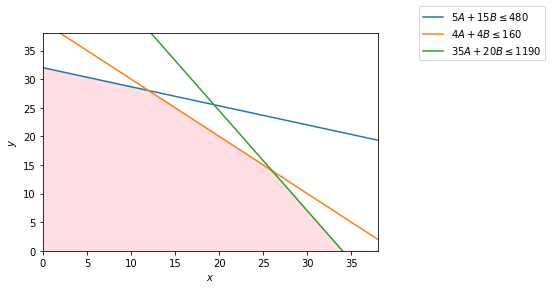

In [9]:
# for printing the figures
z = np.linspace(0, 200, 100) 
# store 100 points in the range of 0, 200 in the form of list 
#Constraints
y1 = (480-5*z)/15
y2 = (160-4*z)/4
y3 = (1190-35*z)/20

# Make plot with the following arguments 
plt.plot(z, y1, label=r'$5A+15B\leq480$')  
plt.plot(z, y2, label=r'$4A+4B\leq160$')
plt.plot(z, y3, label=r'$35A+20B\leq1190$')

# defining the rant=ge of both the axes
plt.xlim((0, p.value(B)+ 10)) # for ploting we will consider that argument which is maximum of all 
plt.ylim((0, p.value(B)+ 10))

#Labelling X and Y axis
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, np.minimum(y1,y3))
plt.fill_between(z, y5, color='pink',alpha=0.5)
plt.legend(bbox_to_anchor=(1.5, 1), loc=5, borderaxespad=0.)
plt.show()